### Setup

In [1]:
import pandas as pd
import os

# Loading data

In [2]:
path = os.path.abspath('')
path = path + "/engineered_data_250ms_window80_step8.csv"
df = pd.read_csv(path)


diction = {'Dany':0, 'Felix':1, 'Julian':2, 'Mark':3,'Martin':4,'Michele':5,'Paul':6}

for index,row in df['Participant'].items():
    df.loc[index,'Participant'] = diction[row]

List = ["Window", "Participant", "Run", "Path"]
for name in df.columns:
    if "Acceleration" in name and not "Linear" in name:
        List.append(name)

df.drop(df.columns.difference(List),axis=1,inplace=True)
df.columns

Index(['Window', 'Participant', 'Path', 'Run',
       'median_Acceleration x (m/s^2)_head_mean',
       'median_Acceleration x (m/s^2)_head_std',
       'median_Acceleration x (m/s^2)_head_last',
       'median_Acceleration x (m/s^2)_head_get_freq',
       'median_Acceleration x (m/s^2)_head_get_weighted_freq',
       'median_Acceleration x (m/s^2)_head_get_power_spectral_entropy',
       'median_Acceleration y (m/s^2)_head_mean',
       'median_Acceleration y (m/s^2)_head_std',
       'median_Acceleration y (m/s^2)_head_last',
       'median_Acceleration y (m/s^2)_head_get_freq',
       'median_Acceleration y (m/s^2)_head_get_weighted_freq',
       'median_Acceleration y (m/s^2)_head_get_power_spectral_entropy',
       'median_Acceleration z (m/s^2)_head_mean',
       'median_Acceleration z (m/s^2)_head_std',
       'median_Acceleration z (m/s^2)_head_last',
       'median_Acceleration z (m/s^2)_head_get_freq',
       'median_Acceleration z (m/s^2)_head_get_weighted_freq',
       'med

## Train test split

In [3]:
#create train/test set
#should maybe do random runs in the future
X_Train = df[df['Run'] < 4].copy()
X_Train
X_Test = df[df['Run'] == 4].copy()

Y_Train = X_Train['Participant'].copy()

Y_Test = X_Test['Participant'].copy()
X_Test.drop(['Participant'],axis=1,inplace=True)
X_Train.drop(['Participant'],axis=1,inplace=True)
X_Train.loc[X_Train['Path'] == 'circle', "Path"] = 1
X_Train
X_Train.loc[X_Train['Path'] == 'straight', "Path"] = 0
X_Test.loc[X_Test['Path'] == 'circle',"Path"] = 1
X_Train
X_Test.loc[X_Test['Path'] == 'straight',"Path"] = 0

# convert Path column to an int representation
X_Train['Path'] = X_Train['Path'].astype(int)

X_Test['Path'] = X_Test['Path'].astype(int)


X_Train

,Window,Path,Run,median_Acceleration x (m/s^2)_head_mean,median_Acceleration x (m/s^2)_head_std,median_Acceleration x (m/s^2)_head_last,median_Acceleration x (m/s^2)_head_get_freq,median_Acceleration x (m/s^2)_head_get_weighted_freq,median_Acceleration x (m/s^2)_head_get_power_spectral_entropy,median_Acceleration y (m/s^2)_head_mean,...,median_Acceleration y (m/s^2)_head_last,median_Acceleration y (m/s^2)_head_get_freq,median_Acceleration y (m/s^2)_head_get_weighted_freq,median_Acceleration y (m/s^2)_head_get_power_spectral_entropy,median_Acceleration z (m/s^2)_head_mean,median_Acceleration z (m/s^2)_head_std,median_Acceleration z (m/s^2)_head_last,median_Acceleration z (m/s^2)_head_get_freq,median_Acceleration z (m/s^2)_head_get_weighted_freq,median_Acceleration z (m/s^2)_head_get_power_spectral_entropy
0,1,1,1,-1.441885,1.664816,0.079860,0.0000,0.145976,2.644804,2.365933,...,4.797909,0.0,0.129416,2.071018,9.072312,0.704681,8.513065,0.0,0.050999,0.042980
1,2,1,1,-1.354020,1.668913,-1.607379,0.0000,0.152539,2.750950,2.793587,...,2.652444,0.0,0.122570,1.492870,9.008865,0.690520,9.079565,0.0,0.050340,0.041829
2,3,1,1,-1.276945,1.523551,-1.642075,0.0000,0.149108,2.703146,2.807282,...,3.206981,0.0,0.121614,1.480909,9.042798,0.696329,9.366405,0.0,0.051699,0.042340
3,4,1,1,-1.242948,1.392956,-2.495415,0.0000,0.150805,2.605224,2.928991,...,1.944168,0.0,0.117329,1.327042,9.033597,0.636086,9.246166,0.0,0.046729,0.036069
4,5,1,1,-1.288124,1.336146,-1.344168,0.0000,0.152741,2.364361,2.821717,...,2.832504,0.0,0.120923,1.344156,9.084389,0.627959,9.212367,0.0,0.044890,0.035065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,28,0,3,-1.435649,1.551049,0.448056,0.0000,0.167106,2.127912,2.976787,...,2.489134,0.0,0.128121,1.610478,8.822307,1.467203,10.273584,0.0,0.106711,0.158179
1302,29,0,3,-1.293418,1.718175,2.827120,0.0000,0.165010,2.700931,2.772036,...,5.612365,0.0,0.143186,1.864197,8.896455,1.409996,7.843374,0.0,0.099032,0.146541
1303,30,0,3,-1.085459,1.779832,1.439881,0.0000,0.161288,3.135314,3.214193,...,5.775377,0.0,0.133831,1.527957,8.752814,1.292409,7.817053,0.0,0.097040,0.132847
1304,31,0,3,-0.873713,1.808765,0.369691,0.0000,0.164181,3.253732,3.486844,...,5.837291,0.0,0.132983,1.356970,8.692852,1.211373,7.888538,0.0,0.092626,0.120462


In [26]:
# from sklearn import svm
# #rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)

# clf = svm.SVC(kernel='rbf',gamma=0.5,C=0.1)
# poly = svm.SVC(kernel='poly', degree=20, C=1)
# clf.fit(X_Train,Y_Train)
# poly.fit(X_Train,Y_Train)
# y_pred = clf.predict(X_Test)
# y_pred_poly = poly.predict(X_Test)
# print(y_pred)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_Test , y_pred))
print("Accuracy:",metrics.accuracy_score(Y_Test , y_pred_poly))


In [4]:
X_Train.dtypes

Window                                                             int64
Path                                                              object
Run                                                                int64
median_Acceleration x (m/s^2)_head_mean                          float64
median_Acceleration x (m/s^2)_head_std                           float64
median_Acceleration x (m/s^2)_head_last                          float64
median_Acceleration x (m/s^2)_head_get_freq                      float64
median_Acceleration x (m/s^2)_head_get_weighted_freq             float64
median_Acceleration x (m/s^2)_head_get_power_spectral_entropy    float64
median_Acceleration y (m/s^2)_head_mean                          float64
median_Acceleration y (m/s^2)_head_std                           float64
median_Acceleration y (m/s^2)_head_last                          float64
median_Acceleration y (m/s^2)_head_get_freq                      float64
median_Acceleration y (m/s^2)_head_get_weighted_fre

In [35]:
X_Train

,Window,Path,Run,median_Acceleration x (m/s^2)_head_mean,median_Acceleration x (m/s^2)_head_std,median_Acceleration x (m/s^2)_head_last,median_Acceleration x (m/s^2)_head_get_freq,median_Acceleration x (m/s^2)_head_get_weighted_freq,median_Acceleration x (m/s^2)_head_get_power_spectral_entropy,median_Acceleration y (m/s^2)_head_mean,...,median_Acceleration y (m/s^2)_head_last,median_Acceleration y (m/s^2)_head_get_freq,median_Acceleration y (m/s^2)_head_get_weighted_freq,median_Acceleration y (m/s^2)_head_get_power_spectral_entropy,median_Acceleration z (m/s^2)_head_mean,median_Acceleration z (m/s^2)_head_std,median_Acceleration z (m/s^2)_head_last,median_Acceleration z (m/s^2)_head_get_freq,median_Acceleration z (m/s^2)_head_get_weighted_freq,median_Acceleration z (m/s^2)_head_get_power_spectral_entropy
0,1,1,1,-1.441885,1.664816,0.079860,0.0000,0.145976,2.644804,2.365933,...,4.797909,0.0,0.129416,2.071018,9.072312,0.704681,8.513065,0.0,0.050999,0.042980
1,2,1,1,-1.354020,1.668913,-1.607379,0.0000,0.152539,2.750950,2.793587,...,2.652444,0.0,0.122570,1.492870,9.008865,0.690520,9.079565,0.0,0.050340,0.041829
2,3,1,1,-1.276945,1.523551,-1.642075,0.0000,0.149108,2.703146,2.807282,...,3.206981,0.0,0.121614,1.480909,9.042798,0.696329,9.366405,0.0,0.051699,0.042340
3,4,1,1,-1.242948,1.392956,-2.495415,0.0000,0.150805,2.605224,2.928991,...,1.944168,0.0,0.117329,1.327042,9.033597,0.636086,9.246166,0.0,0.046729,0.036069
4,5,1,1,-1.288124,1.336146,-1.344168,0.0000,0.152741,2.364361,2.821717,...,2.832504,0.0,0.120923,1.344156,9.084389,0.627959,9.212367,0.0,0.044890,0.035065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,28,0,3,-1.435649,1.551049,0.448056,0.0000,0.167106,2.127912,2.976787,...,2.489134,0.0,0.128121,1.610478,8.822307,1.467203,10.273584,0.0,0.106711,0.158179
1302,29,0,3,-1.293418,1.718175,2.827120,0.0000,0.165010,2.700931,2.772036,...,5.612365,0.0,0.143186,1.864197,8.896455,1.409996,7.843374,0.0,0.099032,0.146541
1303,30,0,3,-1.085459,1.779832,1.439881,0.0000,0.161288,3.135314,3.214193,...,5.775377,0.0,0.133831,1.527957,8.752814,1.292409,7.817053,0.0,0.097040,0.132847
1304,31,0,3,-0.873713,1.808765,0.369691,0.0000,0.164181,3.253732,3.486844,...,5.837291,0.0,0.132983,1.356970,8.692852,1.211373,7.888538,0.0,0.092626,0.120462


# Training Xgboost

Accuracy: 0.9163763066202091


<Axes: >

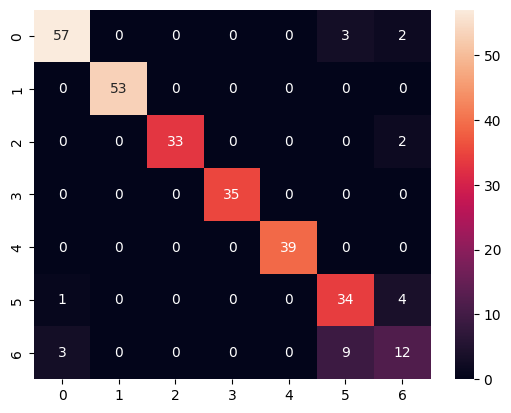

In [6]:

import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
model = XGBClassifier(tree_method = 'hist',objective='multi:softprob')
model.fit(X_Train,Y_Train)
y_pred = model.predict(X_Test)
#Y_Test = Y_Test.astype('int')
print("Accuracy:",metrics.accuracy_score(Y_Test , y_pred))

cm = confusion_matrix(Y_Test,y_pred)
sns.heatmap(cm,annot=True)

## Importance

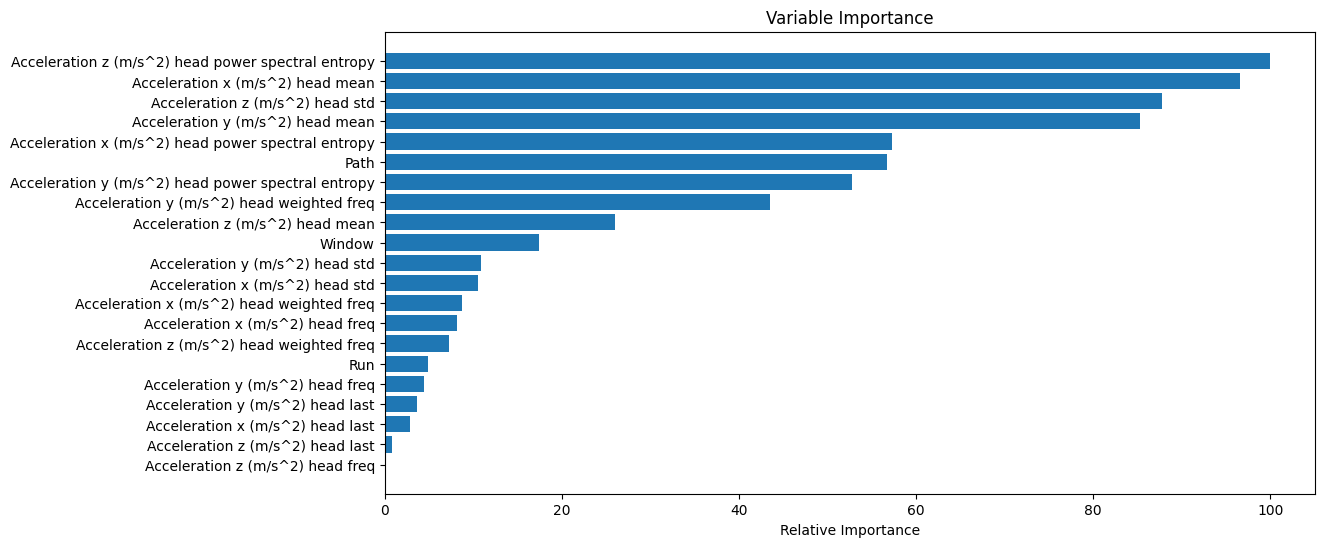

In [16]:
# plot feature importance with correct naming
import numpy as np  
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5

columns = X_Train.columns[sorted_idx]

# rename columns removing the median_ prefix and the get_ infix if present

columns = columns.str.replace('median_','').str.replace('get_','').str.replace('_',' ')




plt.figure(figsize=(12, 6))

plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, columns)

plt.xlabel('Relative Importance')

plt.title('Variable Importance')

plt.show()

Elapsed time to compute the importances: 0.449 seconds


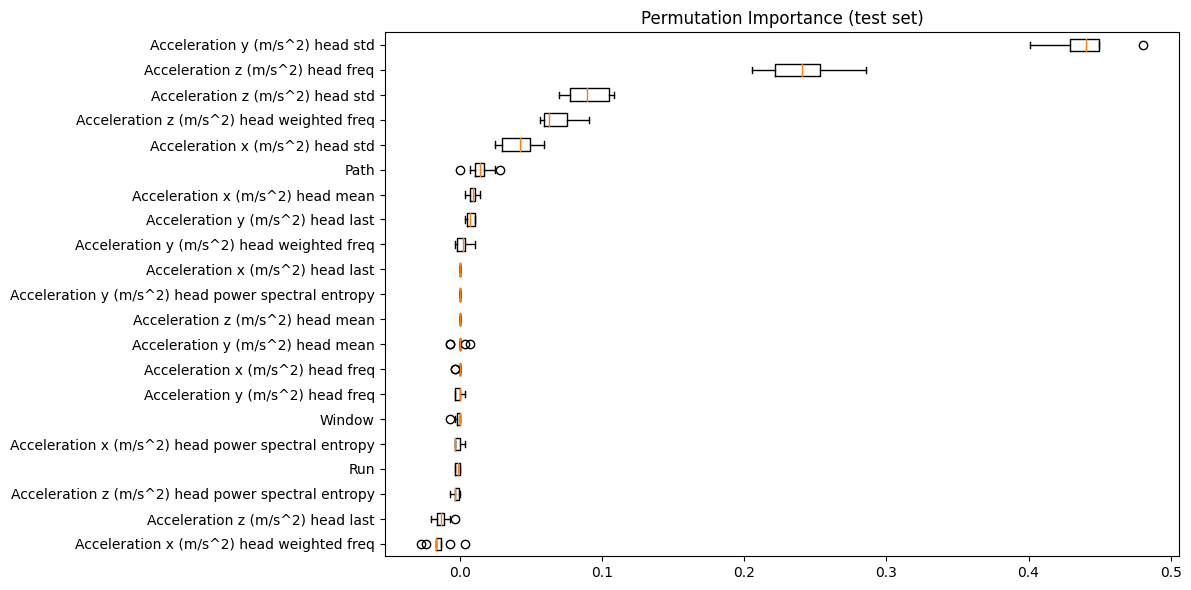

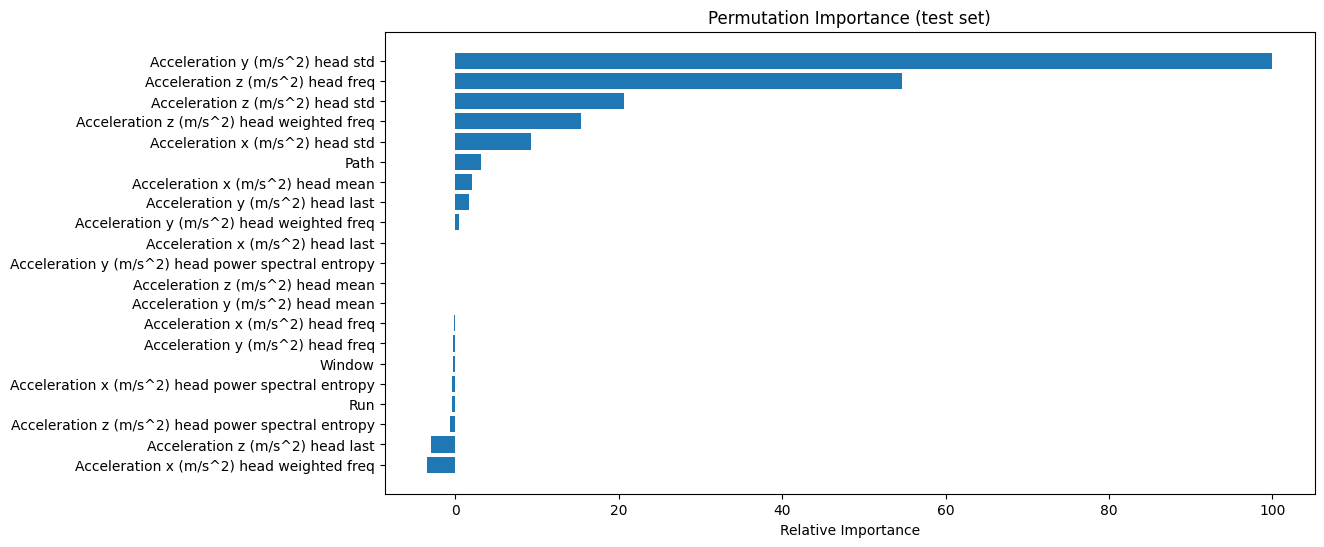

In [18]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time()

result = permutation_importance(model, X_Test, Y_Test, n_repeats=10, random_state=42, n_jobs=2)

elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      
        f"{elapsed_time:.3f} seconds")  

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(12, 6))

columns = columns.str.replace('median_','').str.replace('get_','').str.replace('_',' ')

plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=columns[sorted_idx])

plt.title("Permutation Importance (test set)")

plt.tight_layout()

plt.show()

# plot the permutation importance with correct naming

feature_importance = result.importances_mean

feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5


plt.figure(figsize=(12, 6))

plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, columns[sorted_idx])

plt.xlabel('Relative Importance')

plt.title('Permutation Importance (test set)')

plt.show()



In [22]:
df

,Window,Participant,Path,Run,median_Acceleration x (m/s^2)_head_mean,median_Acceleration x (m/s^2)_head_std,median_Acceleration x (m/s^2)_head_last,median_Acceleration x (m/s^2)_head_get_freq,median_Acceleration x (m/s^2)_head_get_weighted_freq,median_Acceleration x (m/s^2)_head_get_power_spectral_entropy,...,median_Acceleration y (m/s^2)_head_last,median_Acceleration y (m/s^2)_head_get_freq,median_Acceleration y (m/s^2)_head_get_weighted_freq,median_Acceleration y (m/s^2)_head_get_power_spectral_entropy,median_Acceleration z (m/s^2)_head_mean,median_Acceleration z (m/s^2)_head_std,median_Acceleration z (m/s^2)_head_last,median_Acceleration z (m/s^2)_head_get_freq,median_Acceleration z (m/s^2)_head_get_weighted_freq,median_Acceleration z (m/s^2)_head_get_power_spectral_entropy
0,1,0,circle,1,-1.441885,1.664816,0.079860,0.0000,0.145976,2.644804,...,4.797909,0.0,0.129416,2.071018,9.072312,0.704681,8.513065,0.0,0.050999,0.042980
1,2,0,circle,1,-1.354020,1.668913,-1.607379,0.0000,0.152539,2.750950,...,2.652444,0.0,0.122570,1.492870,9.008865,0.690520,9.079565,0.0,0.050340,0.041829
2,3,0,circle,1,-1.276945,1.523551,-1.642075,0.0000,0.149108,2.703146,...,3.206981,0.0,0.121614,1.480909,9.042798,0.696329,9.366405,0.0,0.051699,0.042340
3,4,0,circle,1,-1.242948,1.392956,-2.495415,0.0000,0.150805,2.605224,...,1.944168,0.0,0.117329,1.327042,9.033597,0.636086,9.246166,0.0,0.046729,0.036069
4,5,0,circle,1,-1.288124,1.336146,-1.344168,0.0000,0.152741,2.364361,...,2.832504,0.0,0.120923,1.344156,9.084389,0.627959,9.212367,0.0,0.044890,0.035065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,28,6,straight,3,-1.435649,1.551049,0.448056,0.0000,0.167106,2.127912,...,2.489134,0.0,0.128121,1.610478,8.822307,1.467203,10.273584,0.0,0.106711,0.158179
1302,29,6,straight,3,-1.293418,1.718175,2.827120,0.0000,0.165010,2.700931,...,5.612365,0.0,0.143186,1.864197,8.896455,1.409996,7.843374,0.0,0.099032,0.146541
1303,30,6,straight,3,-1.085459,1.779832,1.439881,0.0000,0.161288,3.135314,...,5.775377,0.0,0.133831,1.527957,8.752814,1.292409,7.817053,0.0,0.097040,0.132847
1304,31,6,straight,3,-0.873713,1.808765,0.369691,0.0000,0.164181,3.253732,...,5.837291,0.0,0.132983,1.356970,8.692852,1.211373,7.888538,0.0,0.092626,0.120462


In [23]:
# print the number of unique runs per individual
df.groupby(['Participant','Path'])['Run'].nunique()

Participant  Path    
0            circle      4
             straight    4
1            circle      4
             straight    4
2            circle      4
             straight    4
3            circle      4
             straight    4
4            circle      4
             straight    4
5            circle      4
             straight    4
6            circle      4
             straight    3
Name: Run, dtype: int64

In [24]:
df['Run'].unique()

array([1, 2, 3, 4])

In [43]:
from itertools import combinations

# a function to implement cross validation given the number of runs we want to use for training (we have 4 in total)
def cross_validation(df, seed, model, training_runs = 3):
    runs = df['Run'].unique() # typically [1,2,3,4] in our case


    if training_runs >= len(runs):
        raise ValueError("The number of training runs should be less than the total number of runs")

    # all possible combinations of runs given the number of runs we want to use for training


    training_combinations = list(combinations(runs, training_runs))

    print(f"Number of training combinations: {len(training_combinations)}")

    print(f"The combinations: {training_combinations}")

    # we will store the accuracy for each combination of runs
    

    accuracies = []

    for training_set in training_combinations:


        X_Train = df[df['Run'].isin(training_set)].copy()

        X_Test = df[~df['Run'].isin(training_set)].copy()

        Y_Train = X_Train['Participant'].copy()

        Y_Test = X_Test['Participant'].copy()

        X_Test.drop(['Participant'],axis=1,inplace=True)

        X_Train.drop(['Participant'],axis=1,inplace=True)

        model.fit(X_Train,Y_Train)

        y_pred = model.predict(X_Test)

        Y_Test = Y_Test.astype('int')

        accuracies.append(metrics.accuracy_score(Y_Test , y_pred))

    return accuracies






    
    

In [44]:

# convert the path column to an int representation

df_copy = df.copy(deep=True)

df_copy.loc[df_copy['Path'] == 'circle', "Path"] = 1

df_copy.loc[df_copy['Path'] == 'straight',"Path"] = 0

df_copy['Path'] = df_copy['Path'].astype(int)






In [46]:
model = XGBClassifier(tree_method = 'hist',objective='multi:softprob')


accuracies = cross_validation(df_copy, 42, model, 2)

Number of training combinations: 6
The combinations: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [38]:
accuracies

[0.889967637540453,
 0.9351701782820098,
 0.9364599092284418,
 0.8682170542635659,
 0.865021770682148,
 0.8924418604651163]

In [49]:
# plot the mean accuracy and the standard deviation for different number of runs and with or without the path column
# create a stripplot to show the distribution of the accuracies with seaborn

import seaborn as sns


df_without_path = df.copy(deep=True)

df_without_path.drop(['Path'],axis=1,inplace=True)

results_list = []

# we will use 2, 3, and 4 runs for training
for training_runs in [1,2, 3]:
    # Assuming cross_validation is a function that returns a list of accuracies
    accuracies = cross_validation(df_copy, 42, model, training_runs)
    for acc in accuracies:
        results_list.append({'Training runs': training_runs, 'accuracy': acc, 'Path': 'yes'})

    accuracies = cross_validation(df_without_path, 42, model, training_runs)
    for acc in accuracies:
        results_list.append({'Training runs': training_runs, 'accuracy': acc, 'Path': 'no'})

# Convert the list of dictionaries to a dataframe
results = pd.DataFrame(results_list)
# plot the results

plt.figure(figsize=(12, 6))

sns.stripplot(x='Training runs', y='accuracy', hue='Path', data=results, jitter=True, dodge=True)

plt.title("Accuracy for different number of training runs and with or without the path column")

plt.show()



Number of training combinations: 4
The combinations: [(1,), (2,), (3,), (4,)]
Number of training combinations: 4
The combinations: [(1,), (2,), (3,), (4,)]
Number of training combinations: 6
The combinations: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
Number of training combinations: 6
The combinations: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
Number of training combinations: 4
The combinations: [(1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)]
Number of training combinations: 4
The combinations: [(1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)]


ValueError: Could not interpret value `Number of runs used for training` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))

sns.stripplot(x='Number of runs used for training', y='accuracy', hue='Path used', data=results, jitter=True, dodge=True)

plt.title("Accuracy for different number of training runs and with or without the path column")

plt.show()
